# **Creación de data tabular de la señales fisiológicas obtenidas en los laboratorios**

In [798]:
#Importación de librerías
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [799]:
#Seleccionamos estilo de ploteo
plt.style.use("ggplot")

In [800]:
def crear_array(archivo):
    #Lectura de documento txt con tabulación (/t) como delimitador
    array1 = np.genfromtxt(archivo, delimiter="\t")
    array1
    
    #Nos quedamos con el dato del sensor
    d_sensor = array1[:,-2]

    return d_sensor

In [801]:
def crear_tiempo(d_sensor):
    #Frecuencia de muestreo del dispositivo de adquisición
    Fs = 1000
    Ts = 1/Fs
    n  = np.arange(0,d_sensor.shape[0])  # t = n*Ts
    t  = n*Ts
    return t


In [802]:
def creacion_dt(d_sensor,t):
    #### Conversión de array a pandas ####
    #Pasamos las observaciones a filas correspondientes a una variable t y d_sensor
    st_sensor = np.concatenate((t.reshape(-1,1),  d_sensor.reshape(-1,1)), axis=1)

    #Creamos el dataframe con las varibles t y d_sensor
    df = pd.DataFrame(st_sensor, columns=["t","d_sensor"])
    
    #Establecemos t como index 
    df = df.set_index("t")

    return df

## Edición de la señal de Estada basal
---

[499. 498. 497. ... 521. 518. 515.]


(0.0, 5000.0)

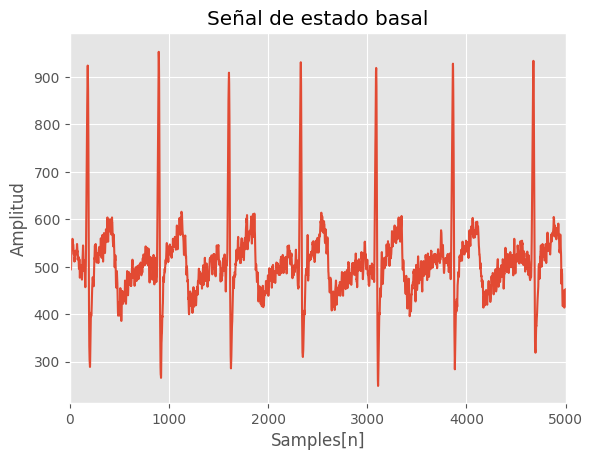

In [803]:
#Creamos un array con las señales que se captaron para el Estado Basal
basal = crear_array("Basal_pac1.txt"); print(basal)
plt.plot(basal)
plt.xlabel('Samples[n]')
plt.ylabel('Amplitud')
plt.title('Señal de estado basal')
plt.grid(True)
plt.xlim(0,5000)

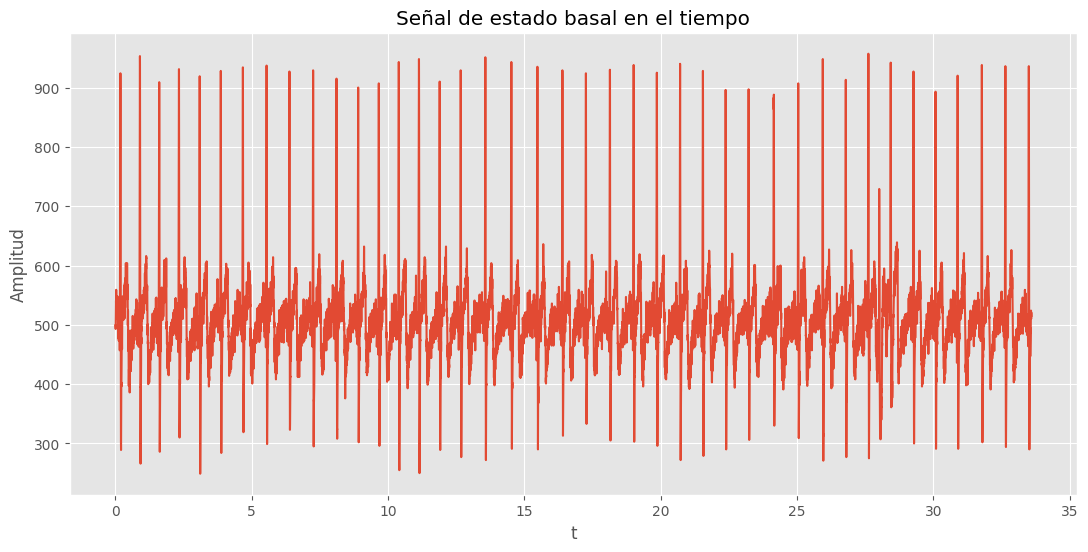

In [804]:
### Ploteo de la señal en el tiempo
t1 = crear_tiempo(basal)
plt.figure(figsize=(13,6)) #Modificamos el tamaño de la gráfica
plt.plot(t1, basal)
plt.xlabel('t')
plt.ylabel('Amplitud')
plt.title('Señal de estado basal en el tiempo')
plt.grid(True)

### Pasando el array a pandas para trabajarlo como series de tiempo

(0.0, 1.0)

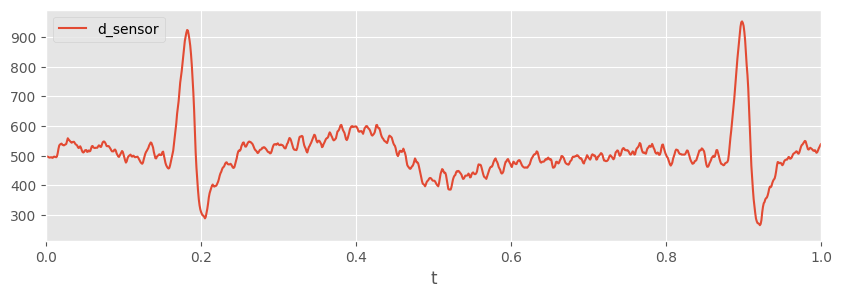

In [805]:
#Ploteamos la señal
df_basal = creacion_dt(basal,t1)
df_basal.plot(figsize=(10,3))
plt.xlim(0,1)

El ploteo nos muestra que la primera señal está desde el tiempo 0 hasta 0.7 aprox, por lo tanto consideraremos 0.7 como la longitud de esta primera señal, con ello los cálculos se darían de la siguiente manera:

47.99857142857144
700.0
[[499. 498. 497. ... 494. 502. 498.]
 [493. 490. 487. ... 489. 482. 480.]
 [479. 479. 474. ... 505. 507. 503.]
 ...
 [519. 520. 522. ... 462. 461. 459.]
 [458. 465. 473. ... 570. 574. 579.]
 [580. 576. 568. ... 521. 518. 515.]]


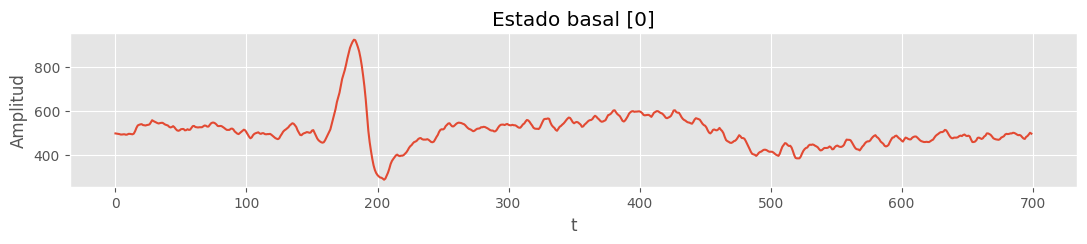

In [806]:
a = df_basal.index.max()/0.7;print(a)
b = df_basal.shape[0]/48; print(b)
d_basal = df_basal[["d_sensor"]].values.reshape(round(a),round(b));print(d_basal)
plt.figure(figsize=(13,2))
plt.plot(d_basal[0])
plt.xlabel('t')
plt.ylabel('Amplitud')
plt.title('Estado basal [0]')
plt.grid(True)

## Edición de la señal de Respiración
---

[529. 529. 529. ... 518. 517. 515.]


(0.0, 5000.0)

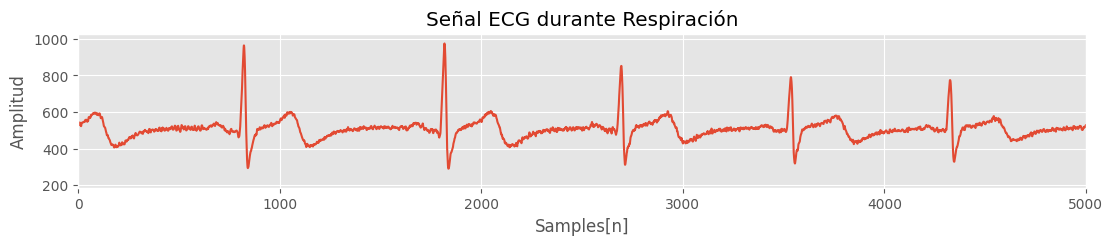

In [807]:
respiracion = crear_array("Respiracion_pac1.txt"); print(respiracion)
plt.figure(figsize=(13,2))
plt.plot(respiracion)
plt.xlabel('Samples[n]')
plt.ylabel('Amplitud')
plt.title('Señal ECG durante Respiración')
plt.grid(True)
plt.xlim(0,5000)

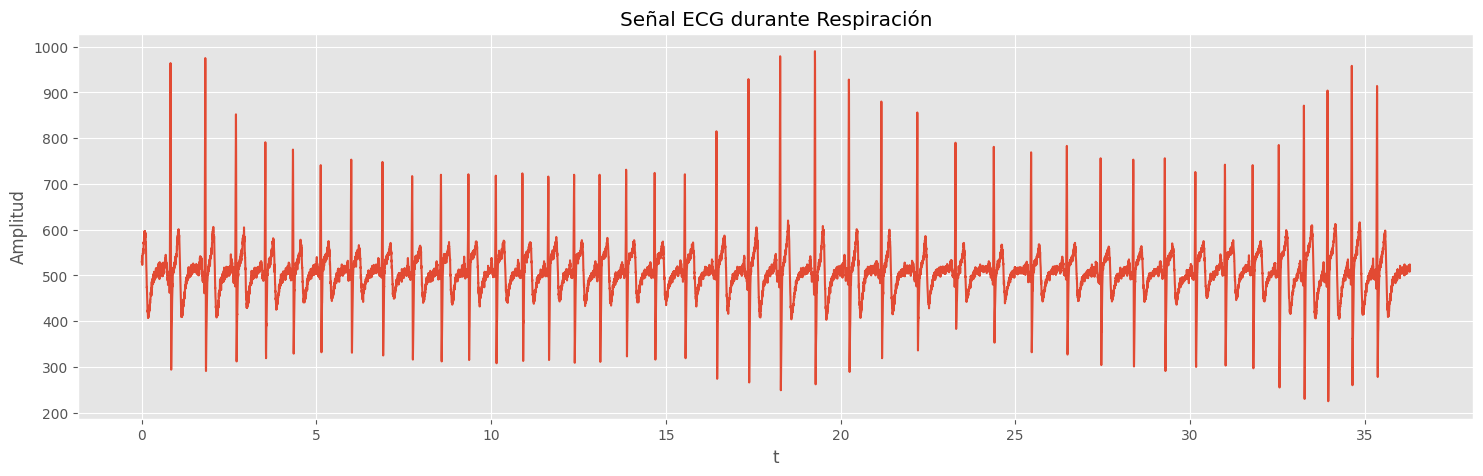

In [808]:
t2 = crear_tiempo(respiracion)
plt.figure(figsize=(18,5))
plt.plot(t2, respiracion)
plt.xlabel('t')
plt.ylabel('Amplitud')
plt.title('Señal ECG durante Respiración')
plt.grid(True)

(0.0, 1.0)

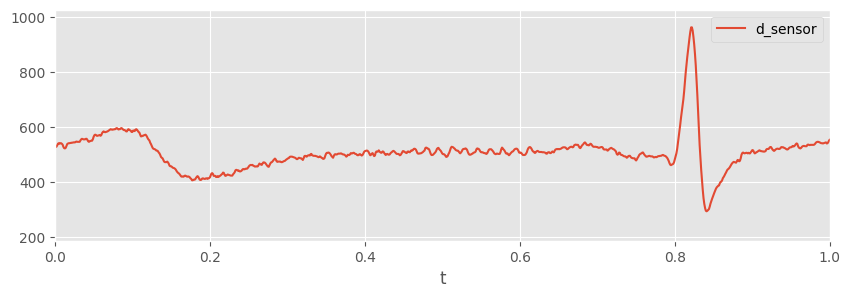

In [809]:
df_respiracion = creacion_dt(respiracion,t2)
df_respiracion.plot(figsize=(10,3))
plt.xlim(0,1)

Podemos apreciar que la señal toma en los primeros instantes del tiempo una muestra incompleta de la señal de ECG, por lo que será necesario modificar dicho array sin considerar ese pequeño muestreo.

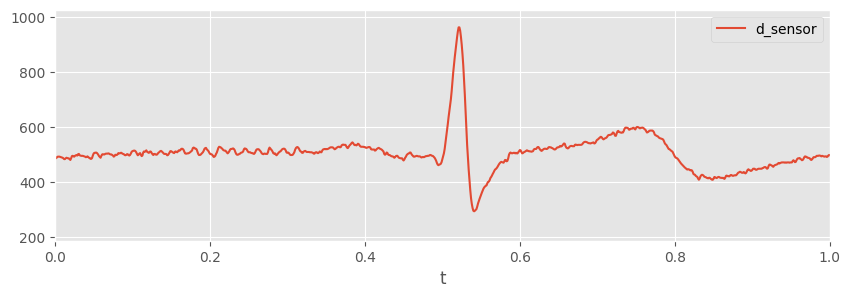

In [810]:
#Modificamos el array
respiracion = respiracion[300:]
#Creamos un nuevo eje de tiempo para la modificación
t2 = crear_tiempo(respiracion)
#Un nuevo dataframe para el array
df_respiracion = creacion_dt(respiracion,t2)
#Imprimimos el resultado para apreciar que ya no se considera ese primer muestreo
df_respiracion.plot(figsize=(10,3))
plt.xlim(0,1);plt.show()

35.999
1000.0
[[485. 487. 488. ... 493. 497. 499.]
 [498. 500. 500. ... 486. 492. 493.]
 [490. 485. 487. ... 510. 512. 515.]
 ...
 [385. 392. 403. ... 432. 431. 431.]
 [433. 432. 432. ... 507. 504. 499.]
 [494. 491. 493. ... 518. 517. 515.]]


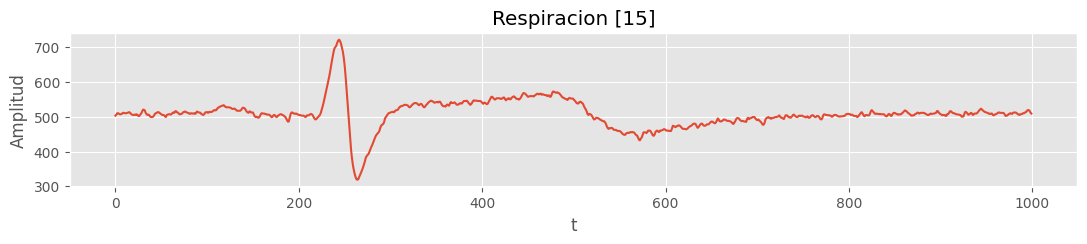

In [811]:
#A partir de ello podemos comenzar a realizar los pasos para crear el dataset correspondiente
a = df_respiracion.index.max()/1;print(a)
b = df_respiracion.shape[0]/36; print(b)
d_respiracion = df_respiracion[["d_sensor"]].values.reshape(36,1000); print(d_respiracion)

#Ploteamos la muestra 15 (como un ejemplo) para apreciar que se logró el dataset
plt.figure(figsize=(13,2))
plt.plot(d_respiracion[15])
plt.xlabel('t')
plt.ylabel('Amplitud')
plt.title('Respiracion [15]')
plt.grid(True)

## Edición de la señal de muestra de Post Ejercicio
---

[464. 463. 462. ... 526. 528. 537.]


(0.0, 5000.0)

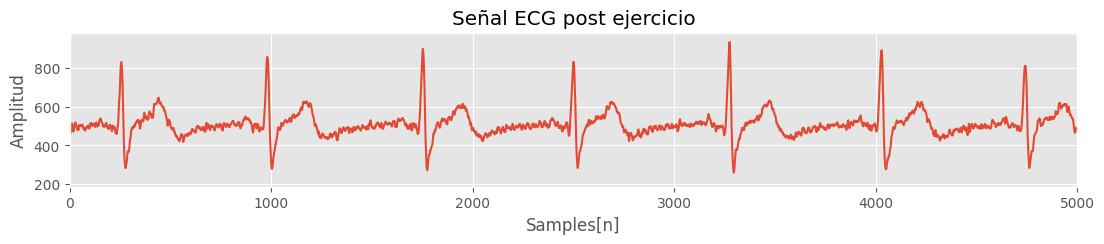

In [812]:
post_ejer = crear_array("Post_ejercicio_pac1.txt"); print(post_ejer)
plt.figure(figsize=(13,2))
plt.plot(post_ejer)
plt.xlabel('Samples[n]')
plt.ylabel('Amplitud')
plt.title('Señal ECG post ejercicio')
plt.grid(True)
plt.xlim(0,5000)

In [813]:
print(len(post_ejer))

36300


Debido que el tamaño de la señal sobrepasa con el tamaño necesitado para la frecuencia de sampleo será necesario modificar el tamaño de la señal para completar con el data set de este, entonces:

In [814]:
post_ejer = post_ejer[0:36000]
print(post_ejer);print(len(post_ejer))

[464. 463. 462. ... 516. 515. 517.]
36000


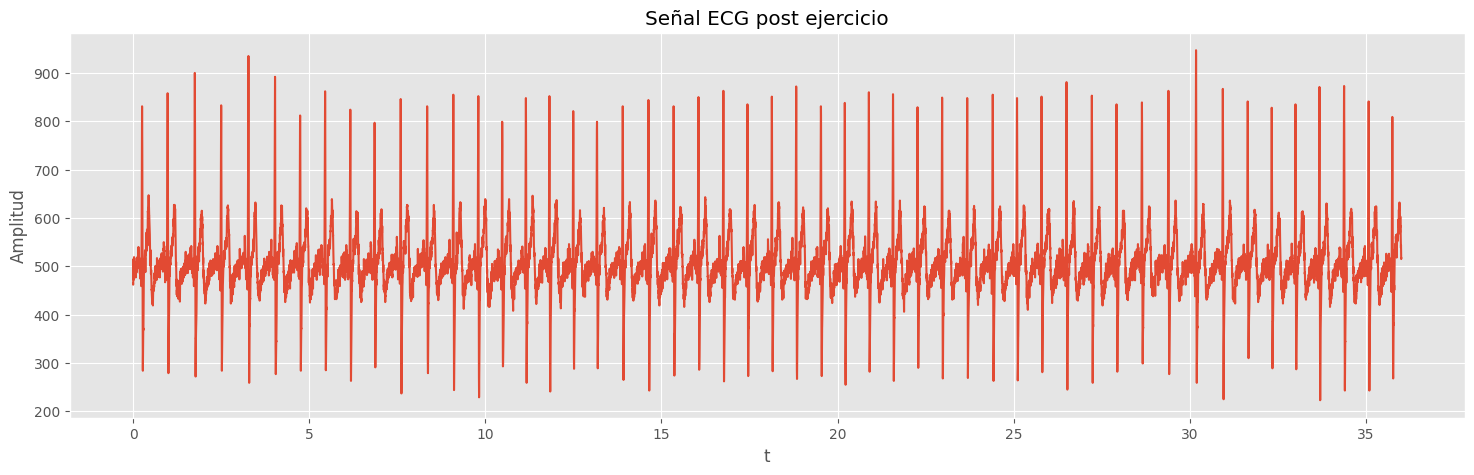

In [815]:
t3 = crear_tiempo(post_ejer)
plt.figure(figsize=(18,5))
plt.plot(t3, post_ejer)
plt.xlabel('t')
plt.ylabel('Amplitud')
plt.title('Señal ECG post ejercicio')
plt.grid(True)

(0.0, 1.0)

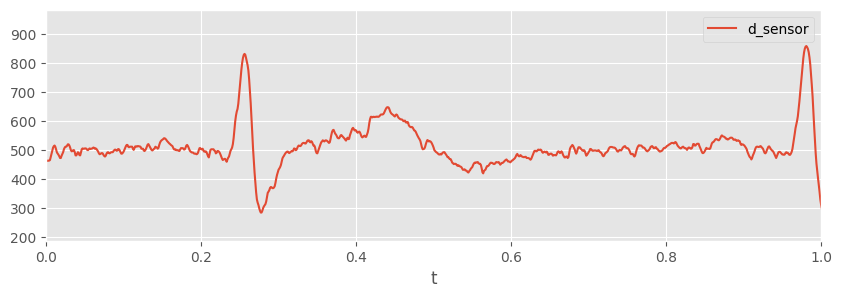

In [816]:
df_post_ejer = creacion_dt(post_ejer,t3)
df_post_ejer.plot(figsize=(10,3))
plt.xlim(0,1)

44.99875
800.0


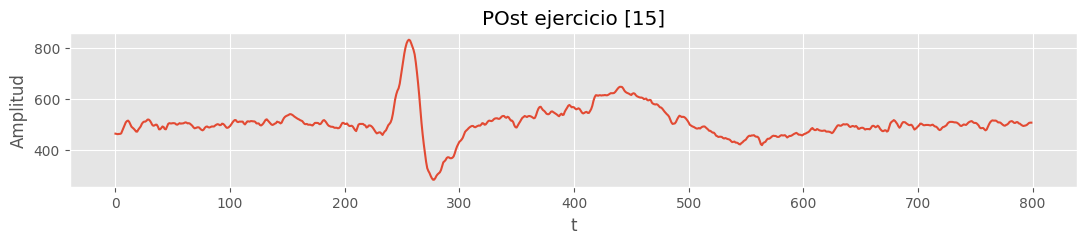

In [817]:
#Realizamos los calculos para la creación del dataset:
a = df_post_ejer.index.max()/0.8;print(a)
b = df_post_ejer.shape[0]/45; print(b)
d_post_ejer = df_post_ejer[["d_sensor"]].values.reshape(45,800)
d_post_ejer
#ploteamos la señal, en la muestra 0
plt.figure(figsize=(13,2))
plt.plot(d_post_ejer[0])
plt.xlabel('t')
plt.ylabel('Amplitud')
plt.title('POst ejercicio [15]')
plt.grid(True)

## Creacion de dataset de las señales analizadas anteriormente
---

Debido que *d_respiracion* presenta 1000 datos en cada fila de sus datos, será necesario completar con ceros las filas de los dataset de *d_basal* y *d_post_ejer* : 

In [818]:
#Iteración para completar los arrays de d_basal y d_post_ejer para que tengan el mismo tamaño de d_respiración
for i in range(300):
    d_basal = (np.concatenate((d_basal,  np.repeat(0, d_basal.shape[0]).reshape(-1,1)), axis=1))

for i in range(200):
    d_post_ejer = np.concatenate((d_post_ejer,  np.repeat(0, d_post_ejer.shape[0]).reshape(-1,1)), axis=1)

# Creamos una categoría
target_0 = np.repeat(0, basal.shape[0])
target_1 = np.repeat(1, respiracion.shape[0])
target_2 = np.repeat(2, post_ejer.shape[0])

In [819]:
#Concatenamos los datasets de las señales
data = np.concatenate([d_basal, d_respiracion, d_post_ejer])

In [821]:
#DataSet listo 
ecg_final = {"base": data ,"target": target}
ecg_final

{'base': array([[499., 498., 497., ...,   0.,   0.,   0.],
        [493., 490., 487., ...,   0.,   0.,   0.],
        [479., 479., 474., ...,   0.,   0.,   0.],
        ...,
        [483., 486., 487., ...,   0.,   0.,   0.],
        [248., 262., 280., ...,   0.,   0.,   0.],
        [538., 536., 533., ...,   0.,   0.,   0.]]),
 'target': array([0, 0, 0, ..., 2, 2, 2])}